# **1. 데이터 셋 로드(손글씨 데이터)** 

In [2]:
# 모델 불러오기
import tensorflow as tf
from tensorflow import keras

In [3]:
mnist = keras.datasets.mnist # 손글씨 숫자 이미지 데이터셋
# x_train: 손글씨 숫자 이미지 타입
# y_train: 이미지가 의미하는 숫자 대입
# x_test: 손글씨 숫자 이미지 대입
# y_test: 이미지가 의미하는 숫자 대입
(x_train,y_train),(x_test,y_test) = mnist.load_data() # 데이터 로딩 -> 로딩 이후 학습용 데이터와 학습 결과 검증용 데이터를 나누어주기

11501568/11490434 [==============================] - 0s 0us/step


In [4]:
x_train, x_test 

(array([[[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        ...,
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],

In [5]:
# 손글씨 숫자 이미지 데이터는 0~ 255 사이의 값을 가짐
# 모델 훈련에 사용하기 전에 0 ~ 1 사이의 범위를 갖도록 변경해주기
# 이유> 작은 숫자로 데이터를 바꿔줌 -> 모델에 더 잘 적용될 수 있도록 함(모델의 특성에 따라 어떻게 처리할 지 결정하면 된다.)
x_train, x_test = x_train/ 255.0, x_test / 255.0 

# **2. 모델 만들기**

### **2-1. 모델 레이어 만들기, 컴파일링**

In [6]:
model = tf.keras.models.Sequential([
    # 크기 28*28의 배열을 입력받아 1차원 배열로 변환
    tf.keras.layers.Flatten(input_shape = (28, 28)), # 레이어 1
    # 히든 레이어의 노드 갯수는 128개, 활성화 함수로 relu 사용
    tf.keras.layers.Dense(128,activation = 'relu'), # 함수 처리
    # 오버피팅 방지, 이전 레이어의 출력을 20%정도 섞어준다.
    tf.keras.layers.Dropout(0.2), # 레이어 2
    # 출력 레이어의 노드 갯수를 10개로 설정, 활성화 함수는 softmax
    tf.keras.layers.Dense(10,activation = 'softmax') # 함수 처리
])

# model 컴파일링
model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy', # 원 핫 인코딩 형태로 결과 반환
              metrics = ['accuracy']
              )

### **2-2. 모델 학습시키기**

In [7]:
# Training
model.fit(x_train,y_train,epochs = 10) # epoch = 돌리는 횟수(모델의 실행 횟수)
model.evaluate(x_test,y_test) # 모델의 성능 확인하기
# 기계를 학습시킬 때마다 오차율(loss function의 결과값)이 줄어들고 정확도(accuracy)가 증가하고 있음을 확인할 수 있음.

Epoch 1/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3011 - accuracy: 0.9122
Epoch 2/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.1442 - accuracy: 0.9571
Epoch 3/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.1085 - accuracy: 0.9676
Epoch 4/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0878 - accuracy: 0.9726
Epoch 5/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0750 - accuracy: 0.9766
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0670 - accuracy: 0.9793
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0580 - accuracy: 0.9812
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0515 - accuracy: 0.9833
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0482 - accuracy: 0.9836
Epoch 10/10
313/313 [==============================] - 1s 2ms/step - loss: 0.0671 

[0.06714089214801788, 0.9812999963760376]

### **2-3. 모델의 성능 확인하기**

In [8]:
# x_train의 랜덤한 가격을 추출
# 내 코드
import random
idx = random.choice(x_train)

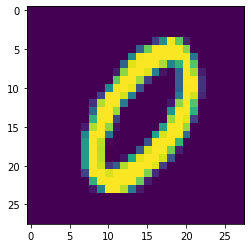

In [9]:
# 이미지로 확인하기
# 내 코드
import matplotlib.pyplot as plt
import matplotlib.image as img

plt.imshow(idx)

In [10]:
# x_train의 랜덤한 가격을 추출
# 강사님 코드
import numpy as np
idx = np.random.randint(len(x_train)) # x_train의 길이만큼의 구간에서 난수를 하나 발생시켜라 -> 인덱스 번호로 사용
image = x_train[idx] # 랜덤으로 추출된 인덱스 번호에 해당하는 이미지 선택

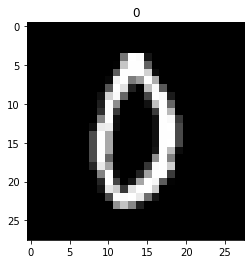

In [11]:
# image 확인하기
import matplotlib.pyplot as plt
import matplotlib.image as img

image = x_train[idx]
plt.imshow(image,cmap = "gray") # cmap: 배경 설정(회색으로 배경 설정하기)
plt.title(y_train[idx])
plt.show()

In [12]:
import os
from PIL import Image
from google.colab import files

# 코랩에서만 필요한 코드(밑에 세 줄/로컬: 음 몰라요^^;)
uploaded = files.upload()
for fn in uploaded.keys():
  print("업로드 파일 이름: {name}, 용량: {length} bytes".format(name = fn,length = len(uploaded[fn])))

KeyboardInterrupt: ignored

In [ ]:
# image file의 경로 설정
cur_dir = os.getcwd()
img_path = os.path.join(cur_dir, 'image.png')
print(img_path)
cur_img = Image.open(img_path)

# 28 * 28 resize
cur_img = cur_img.resize((28, 28))
image = np.asarray(cur_img)

# color image 일 경우 RGB 평균값으로 gray scale로 적용
try:
  image = np.mean(image, axis=2)
except: # 예외 발생 시에는 아무것도 하지 말고 그냥 넘어가라!
  pass

# uploat한 image는 흰 배경에 검은 글씨로 되어 있으므로, MNIST data와 같이 검은 배경 흰 글씨로 변경
image = np.abs(255-image)

# MNIST와 동일하게 data preprocessing(255로 나눠줌 -> 손글씨 숫자 이미지 데이터는 0~ 255 사이의 값을 가지니까!)
image = image.astype(np.float32) /255

# 화면에 출력
plt.imshow(image, cmap='gray')
plt.show()

In [ ]:
# shape를 변경하여 학습된 model에 넣고 결과를 확인
image = np.reshape(image,(1,28,28)) # 1장의 이미지, 픽셀 사이즈
print(model.predict(image))

print('model이 예측한 것은 {}입니다.'.format(np.argmax(model.predict(image),-1)))

# **3. 데이터 셋 로드하기(쇼핑몰 사진 데이터)**

### **3-1. 데이터 전처리**
* 데이터 셋의 shape 확인
* 모델에 학습시키기 좋은 방향으로 데이터 전처리

In [13]:
# Dataset
# 데이터를 처리하여 model에 공급하기 위하여 tensorFlow에서는 tf.data.Dataset을 사용함

# 트레이닝셋 6만개, 테스트셋 1만개, 이미지 28*28 그레이스케일, 10개의 클래스
mnist = keras.datasets.fashion_mnist
# 클래스 이름 지정
class_name = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 
               'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

(train_images , train_labels),(test_images,test_labels) = mnist.load_data() # 데이터를 불러와 각각 train set과 test set으로 구분

4431872/4422102 [==============================] - 0s 0us/step


In [14]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [ ]:
# train_image, train_labels의 shape 확인
print(train_images.shape,train_labels.shape)

In [ ]:
# test_image, test_labels의 이미지 확인하기
print(test_images.shape,test_labels.shape)

In [ ]:
type(train_images)

In [ ]:
# training set의 각 class별 image의 수를 확인하기
unique,counts = np.unique(train_labels,axis = -1, return_counts = True)
dict(zip(unique,counts))

In [ ]:
# test set의 각 class별 image의 수를 확인하기
unique,counts = np.unique(test_labels,axis = -1, return_counts = True)
dict(zip(unique,counts))

In [ ]:
plt.figure(figsize = (8,8))

for i in range(9):
  plt.subplot(3,3,i+1) # 3행 3열로 그래프 개요 그려놓고 i+1번째에 위치시키기(1번부터 시작하기에 I+1이다.)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i],cmap = 'gray')
  plt.title(class_name[train_labels[i]])

plt.show()

In [ ]:
# 데이터 전처리
# image를 0~1 사이의 값으로 만들기 위해 255로 나눔
train_image = train_images.astype(np.float32)/255. # 255.: 소수점을 주겠다!(실수값이 되도록 하겠다.)
test_image = test_images.astype(np.float32)

# one-hot encoding
# keras.utils.to_categorical() : 원핫 인코딩을 해주는 메서드
train_labels = keras.utils.to_categorical(train_labels) 
test_labels = keras.utils.to_categorical(test_labels,10)

In [ ]:
# dataset 만들기
# shuffle: 셔플을 하지 않으면 다음에 들어갈 데이터가 중복되어 들어갈 수 있음
# epochs: 할 때 shuffle을 사용 -> 데이터 중복 방지
# batch: 한 번에 여러 개의 이미지를 넣어주는데, 각각의 회차에서 몇 개씩 넣을 것인지 결정

train_dataset = tf.data.Dataset.from_tensor_slices((train_images,train_labels)).shuffle(
    buffer_size = 100000).batch(64) # 버퍼사이즈: 메모리에 지닐 수 있는 총 저장 사이즈
test_dataset = tf.data.Dataset.from_tensor_slices((test_images,test_labels)).batch(64)

In [ ]:
# Dataset을 통해 반복(iterator)
imgs,lbs = next(iter(train_dataset))
print(f'Feature batch shape: {imgs.shape}') # f: 형식지정자(float 값)
print(f'Label batch shape: {lbs.shape}')

img = imgs[0]
lb = lbs[0]
plt.imshow(img,cmap = 'gray')
plt.show()
print(f'Label: {lb}')

# Label: [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.] -> 바지

In [ ]:
# Custom Dataset 만들기
a = np.arange(10)
print(a)

ds_tensors = tf.data.Dataset.from_tensor_slices(a) # 데이터의 형태를 텐서로 변경
print(ds_tensors)

for x in ds_tensors:
  print(x)

In [ ]:
# shuffle(정수): 큐 사이즈 만큼 셔플/ 10개 이상이면 10개 모두 셔플, 10보다 작으면 일부만 셔플
# batch(정수): 숫자만큼 레이어로 데이터를 보냄

ds_tensors = ds_tensors.map(tf.square).shuffle(10).batch(2) 
# tf.square: 제곱 -> 10개보다 작으면 모두 셔플, 아니면 10개만 골라서 셔플->숫자 사이즈만큼 레이어로 데이터를 보내라

In [ ]:
for _ in range(3):
  for x in ds_tensors:
    print(x)
  print('-'*50)

### **3-2. 모델 만들기**

텐서플로우에서는 3가지 모델 작성 방법을 제공함

##### **3-2-1. Keras의 Sequential API**
- 모델을 가장 간단하고 쉽게 만들 수 있는 방법
- Sequential API를 이용하면 쌓이는 구조로만 모델을 생성할 수 있음 
> 다양한 가지치기 같은 모델 layer를 생성하려면 create_func_model과 같은 형태로 생성하여 구현함

In [ ]:
# 모델을 생성하는 함수를 정의
def create_seq_model():
  model = keras.Sequential() 
  model.add(keras.layers.Flatten(input_shape = (28,28))) # 데이터를 받아주는 부분(layer로 취급 x)
  model.add(keras.layers.Dense(128,activation='relu')) # layer1
  model.add(keras.layers.Dropout(0.2)) # layer로 취급 x
  model.add(keras.layers.Dense(10,activation = 'softmax')) # layer2

  return model

In [ ]:
seq_model = create_seq_model() # 모델 생성하기

In [ ]:
seq_model.summary() # 모델의 요약 정보 출력

##### **3-2-2. Keras의 Functional API**

In [ ]:
# 모델 생성 함수 정의하기

def create_func_model():
  inputs = keras.Input(shape = (28,28))
  flatten = keras.layers.Flatten()(inputs) # 레이어 1
  dense = keras.layers.Dense(128,activation = "relu")(flatten) # 활성화 함수 지정(레이어에 포함시키지는 x)
  drop = keras.layers.Dropout(0.2)(dense) # 레이어 2
  outputs = keras.layers.Dense(10,activation = 'softmax')(drop) # 활성화 함수 지정(레이어에 포함시키지는 x)
  model = keras.Model(inputs = inputs,outputs = outputs) # 모델에 입력값, 출력값 지정해주기
  return model

In [ ]:
func_model = create_func_model()

In [ ]:
func_model.summary()

##### **3-2-3.Model Class Subclassing 사용**
- 파이토치가 가장 많이 사용하는 방법

In [ ]:
# 모델 생성을 위한 클래스 정의하기
class SubClassModel(keras.Model):
  def __init__(self):
    super(SubClassModel,self).__init__() # 서브클래스 모델 상속, 케라스 모델의 생성자 호출!
    self.flatten = keras.layers.Flatten(input_shape = (28,28)) # 레이어 1
    self.dense1 = keras.layers.Dense(128,activation = 'relu')
    self.drop = keras.layers.Dropout(0.2) # 레이어 2
    self.dense2 = keras.layers.Dense(10,activation = 'softmax')

  def call(self,x,training = False): # training = False: 학습이 되기 전의 값들을 setting(default)
    x = self.flatten(x)
    x = self.dense1(x)
    x = self.drop(x)
    return self.dense2(x)

In [ ]:
subclass_model = SubClassModel()

In [ ]:
inputs = tf.zeros((1,28,28))
subclass_model(inputs)
subclass_model.summary()

In [ ]:
# Train / Validation
# Keras의 Sequential API 사용
learning_rate = 0.001 # 학습율 조정 -> 최적의 결과를 내기 위함!
seq_model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate),
                  loss = 'categorical_crossentropy',
                  metrics = ['accuracy']) 
# optimization: 모델을 학습에 적용시킬 때 학습 속도를 빠르고 안정적이게 하는 행위(구글링)
# Adam() -> 모델을 학습에 적용시키는 옵티마이져/ GradientDescent 방식 적용

In [ ]:
history = seq_model.fit(train_dataset,epochs = 10,validation_data = test_dataset)

In [ ]:
plt.plot(history.history['loss'],'b-',label = 'loss')
plt.plot(history.history['val_loss'],'r--',label = 'val_loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

In [ ]:
plt.plot(history.history['accuracy'],'b-',label = 'acc') # 각 시행마다의 훈련의 정확도
plt.plot(history.history['val_accuracy'],'r--',label = 'val_acc') # 각 시행마다 검증된 '실제' 정확도
plt.xlabel('Epoch')
plt.legend()
plt.show()

# **4. 모델의 저장 & 불러오기**

* 학습된 결과를 저장해놓고 사용, 또는 이어서 학습하기 위해 모델을 저장하고 불러오는 방법

In [ ]:
seq_model.save_weights('seq_model.ckpt') # 이미 학습된 결과가 저장된 파일(아직은 학습이 되지 x)

In [ ]:
# 모델 생성
seq_model_2 = create_seq_model()
seq_model_2.compile(optimizer = tf.keras.optimizers.Adam(learning_rate),
                    loss = 'categorical_crossentropy',
                    metrics = ['accuracy'])

In [ ]:
seq_model_2.evaluate(test_dataset) # 확인

In [ ]:
seq_model_2.load_weights('seq_model.ckpt') # 학습된 ckpt 파일 적용하기

In [ ]:
seq_model_2.evaluate(test_dataset) 
# 학습 이전에 비해 모델의 정확도가 매우 증가하였음을 알 수 있음

In [ ]:
# 모델 전체를 저장하고 불러오는 방법
seq_model.save('seq_model')

In [ ]:
!ls

In [ ]:
seq_model_3 = keras.models.load_model('seq_model')

In [ ]:
seq_model_3.evaluate(test_dataset)

# **4. Tensorboard를 사용하여 시각화하기**

학습된 결과를 눈으로 보기 쉽게 하기 위하여 사용하는 시각화 도구

In [ ]:
%load_ext tensorboard

In [ ]:
new_model_1 = create_seq_model()
new_model_1.compile(optimizer = tf.keras.optimizers.Adam(learning_rate),
                    loss = 'categorical_crossentropy',
                    metrics = ['accuracy'])

In [ ]:
new_model_1.evaluate(test_dataset)

In [ ]:
log_dir = './logs/new_model_1'
tensorboard_cb = keras.callbacks.TensorBoard(log_dir,histogram_freq = 1)
# histogram_freq : 1이면 각 에폭마다 텐서보드에 결과를 저장함, default는 0(저장 x)

In [ ]:
new_model_1.fit(train_dataset,epochs = 10,validation_data = test_dataset, callbacks = [tensorboard_cb])
# callbacks = [tensorboard_cb] ; 여러 데이터를 적용하기 위해 리스트 형태로 사용

In [ ]:
%tensorboard--logdir $log_dir

* 참고할 사이트   
https://wikidocs.net/36033